building grid stimsets for use with DMD. Sequence optimization is based on solution to traveling salesman problem discussed here: https://stackoverflow.com/questions/25585401/travelling-salesman-in-scipy
Thanks to the Stack Overflow community.

In [1]:
from stimset_builder import *

In [2]:
##Create a sequence of rectangular stimuli corresponding to specified grid dimension.
##Plotted in 1024x1024 'camera space' with margins that correspond to borders of DMD (manually measured and spec'd in code)
grid_stims = draw_all_grid_rects(n_cols=12, n_rows=10)

In [ ]:
##make an array of center of masses
coms = image_sequence_com(grid_stims)
coms = np.array(coms)

In [ ]:
i=100
plt.imshow(grid_stims[:,:,i].T)
plt.scatter(coms[i][0], coms[i][1])

In [ ]:
## design photostim order to minimize distance (i.e. traveling salesman)
## will not use this, except for comparison to maximized distance order
route = two_opt(coms,0.001)


In [ ]:
route_ix=[]
for i in np.arange(len(route)):
    route_ix.append(list(route).index(i))

In [ ]:
new_route_order = np.concatenate((np.array([coms[route[i]] for i in range(len(route))]),np.array([coms[0]])))
fig, ax = plt.subplots()
sc = ax.scatter(coms[:,0],coms[:,1], c=route_ix, cmap='twilight', zorder=5, s=100)
# Plot the path.
ax.plot(new_route_order[:,0],new_route_order[:,1], zorder=0, c='black', lw=1)
fig.colorbar(sc)
plt.show()
# Print the route as row numbers and the total distance travelled by the path.
print("Route: " + str(route) + "\n\nDistance: " + str(path_distance(route,coms)))

In [8]:
long_route = two_opt_long(coms,0.0001)

In [9]:
route_ix=[]
for i in np.arange(len(route)):
    route_ix.append(list(long_route).index(i))

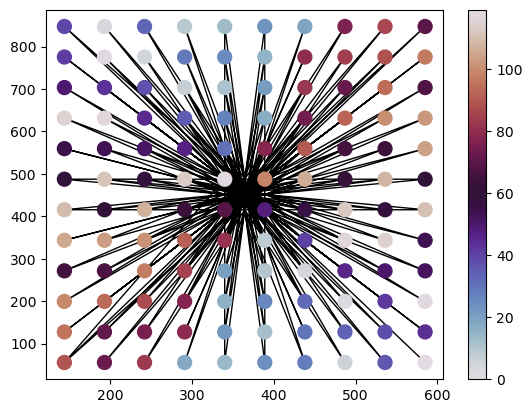

Route: [  9 101  27 111  36 102   7  93  45 113  35  94  15 114   4 105  24  85
   3 116  34  95  14 115   5 104  25  84   6 103  16  74  26 112  17  83
   8  92  18 110  46 100  28  91  19  82  37  73  55  90  38  72  39  71
  49  70  56  62  58  60  69  51  67  53  78  30  77  31  99  54 119  11
  97   1  86  12 117  23  75  13 106  44  96   2 107  33 118  22 108   0
  76  43  87  21  98  10 109  32  65  20  88  42  89  41  79  40  66  52
  68  50  59  61  57  63  48  80  47  81  29  64]

Distance: 63391.19478178264


In [10]:
new_route_order = np.concatenate((np.array([coms[long_route[i]] for i in range(len(long_route))]),np.array([coms[0]])))
fig, ax = plt.subplots()
sc = ax.scatter(coms[:,0],coms[:,1], c=route_ix, cmap='twilight', zorder=5, s=100)
# Plot the path.
ax.plot(new_route_order[:,0],new_route_order[:,1], zorder=0, c='black', lw=1)
fig.colorbar(sc)
plt.show()
# Print the route as row numbers and the total distance travelled by the path.
print("Route: " + str(long_route) + "\n\nDistance: " + str(path_distance(long_route,coms)))

In [11]:
##have not explicitly avoided having adjacent pixels in long route. May add in future. See how did by comparing min. distances.
min_dist_short_route = np.min(distances_all_steps(route, coms))
min_dist_long_route = np.min(distances_all_steps(long_route, coms))
print ("min dist short path: %s pixels", (min_dist_short_route))
print ("min dist long path: %s pixels", (min_dist_long_route))

min dist short path: %s pixels 49.0
min dist long path: %s pixels 174.18381095842403


In [12]:
long_path_grid = reorder_stimset(grid_stims, long_route)

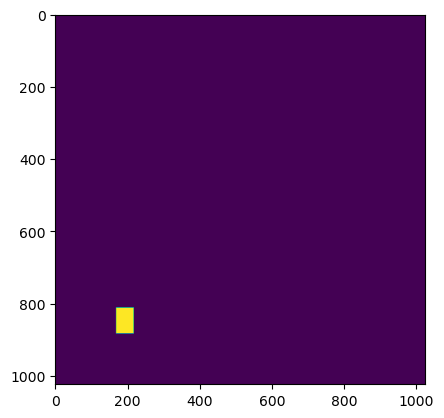

In [13]:
i=3
plt.imshow(long_path_grid[:,:,i].T)

In [14]:
grid_12by10 = StimPatternSet(long_path_grid, "grid_12by10", long_route)

In [15]:
import pickle

In [16]:
with open(f'grid_12by10.pickle', 'wb') as file:
    pickle.dump(grid_12by10, file) 

In [17]:
with open(f'grid_12by10.pickle', 'rb') as file2:
    grid_new = pickle.load(file2)

In [18]:
grid_new.name

'grid_12by10'

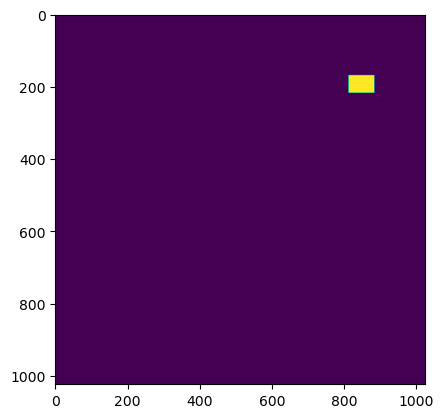

In [19]:
stim_pats = grid_new.stim_pattern
plt.imshow(stim_pats[:,:,3])